In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Q2
**2. (Code) Show the histogram for “SalePrice” (using matplotlib or seaborn) in the report.**

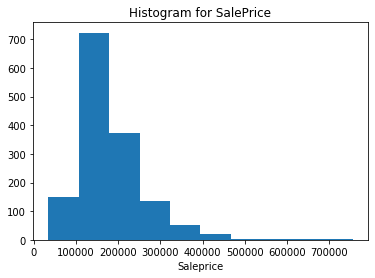

In [4]:
plt.figure()
plt.hist(df["SalePrice"])
plt.title('Histogram for SalePrice')
plt.xlabel('Saleprice')
plt.savefig('hist_of_saleprice.pdf')
plt.show()

# Q3
**3. (Code) Draw a boxplot for every numeric attribute using matplotlib or seaborn. Save the results in the Python
notebook file. You do not need to include these plots in your report.**

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Create a list to store the name of all numeric attributes except 'SalePrice'
list_of_numeric_attributes = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd',
                              'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                              'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
                               'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
                              'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
                              'Fireplaces','GarageYrBlt','GarageCars','GarageArea',
                              'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                              'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

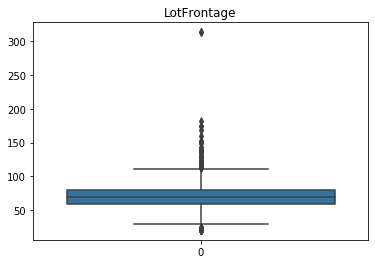

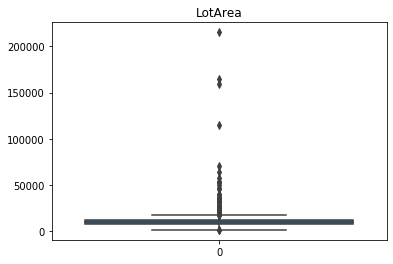

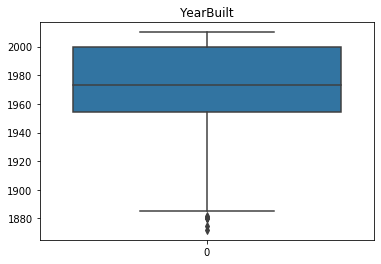

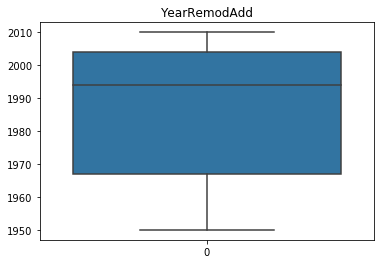

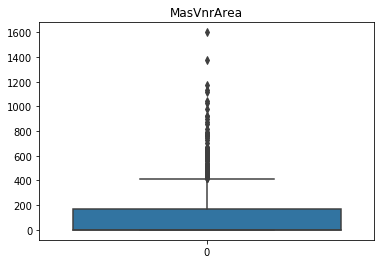

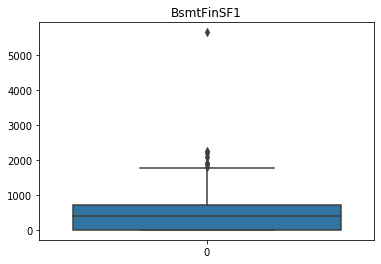

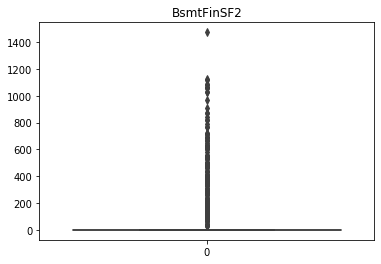

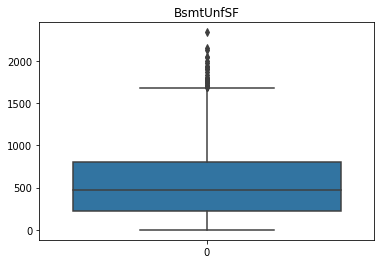

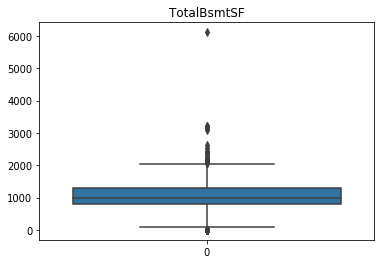

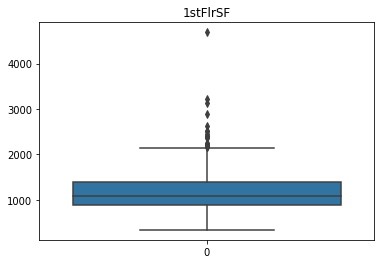

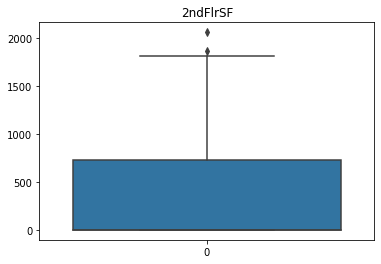

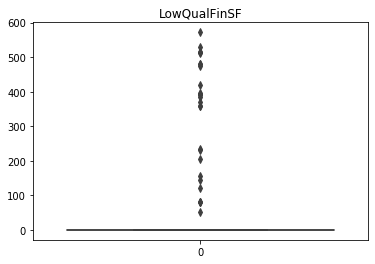

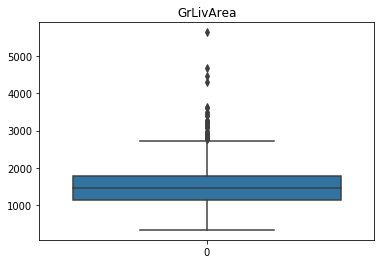

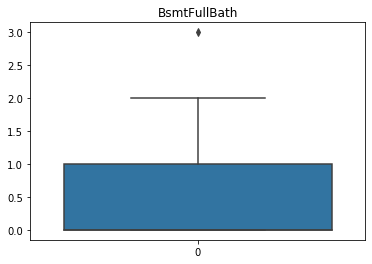

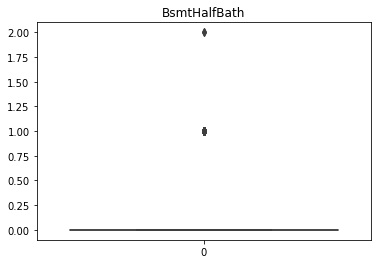

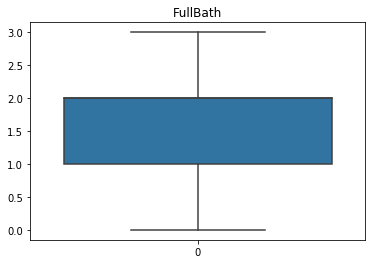

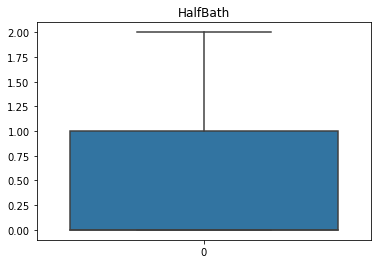

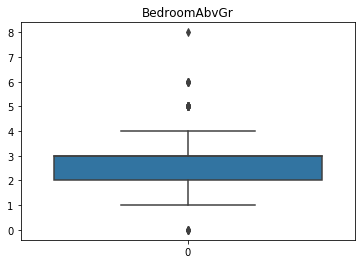

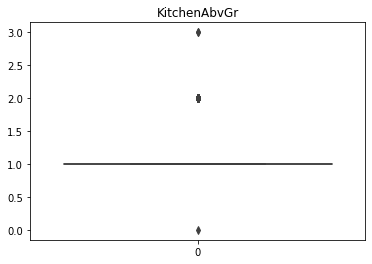

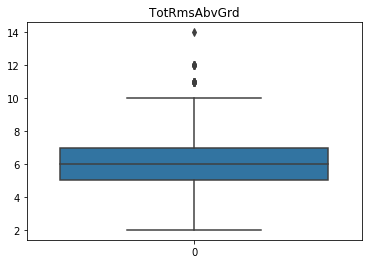

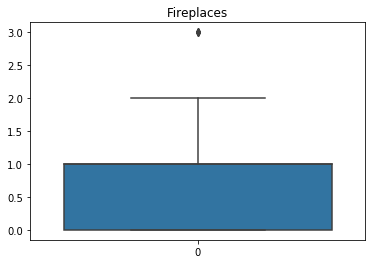

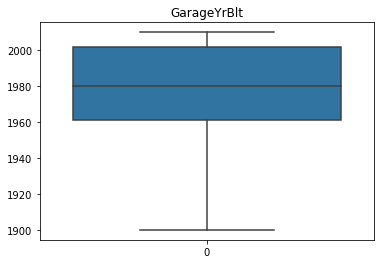

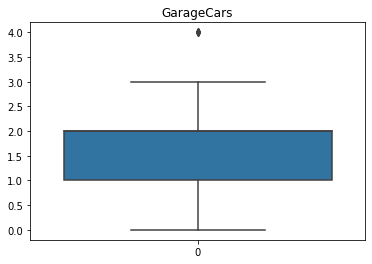

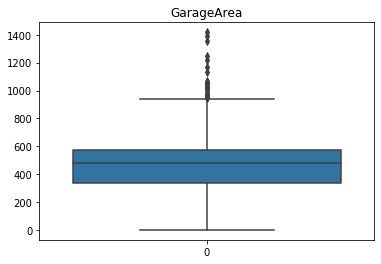

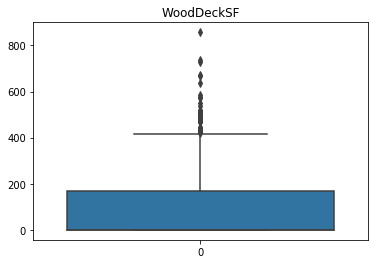

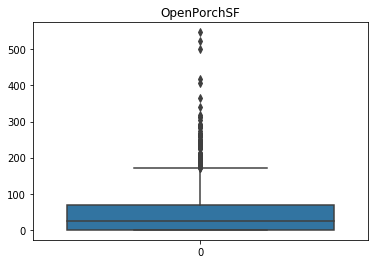

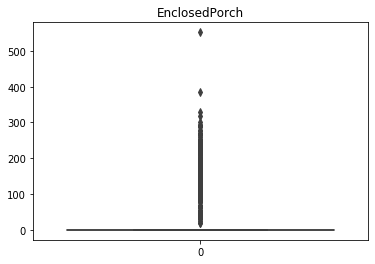

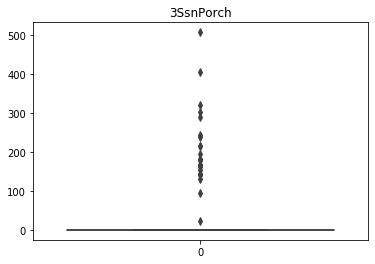

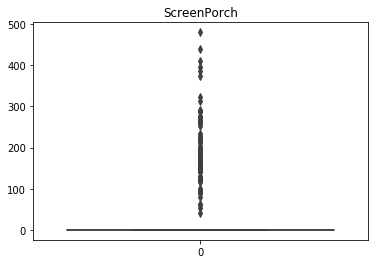

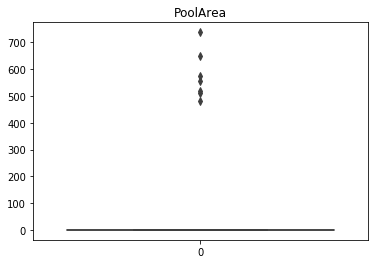

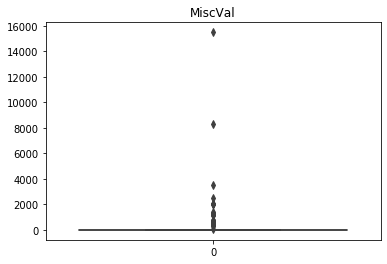

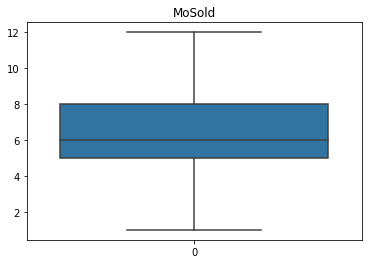

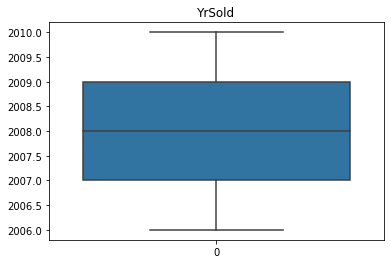

In [7]:
# Draw boxplot for every numeric attribute
for attribute in list_of_numeric_attributes:
    box_plot = sns.boxplot(data=df[attribute])
    box_plot.set_title(attribute)
    plt.show()

# Q4
**4. (Code) Delete a record if any of its numeric attribute values is an outlier from the boxplot. Show the number of deleted records in the report.**

In [8]:
Q1 = df[list_of_numeric_attributes].quantile(0.25)
Q3 = df[list_of_numeric_attributes].quantile(0.75)
IQR = Q3 - Q1

In [9]:
upper_outliers = df[list_of_numeric_attributes]>Q3+1.5*IQR
lower_outliers = df[list_of_numeric_attributes]<Q1-1.5*IQR
deleted_records = df[list_of_numeric_attributes][(upper_outliers|lower_outliers).any(axis=1)]
deleted_records

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,460,298,0,0,0,0,0,0,5,2007
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,642,0,35,272,0,0,0,0,2,2006
5,85.0,14115,1993,1995,0.0,732,0,64,796,796,...,480,40,30,0,320,0,0,700,10,2009
7,NaN,10382,1973,1973,240.0,859,32,216,1107,1107,...,484,235,204,228,0,0,0,350,11,2009
8,51.0,6120,1931,1950,0.0,0,0,952,952,1022,...,468,90,0,205,0,0,0,0,4,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,60.0,9000,1974,1974,0.0,0,0,896,896,896,...,0,32,45,0,0,0,0,0,9,2009
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,500,349,0,0,0,0,0,0,2,2010
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,252,0,60,0,0,0,0,2500,5,2010
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,240,366,0,112,0,0,0,0,4,2010


In [10]:
# number of deleted records
len(deleted_records)

829

In [11]:
# Create a dataframe to store all numeric attributes after removing records of outliers
numeric_df = df[list_of_numeric_attributes][~(upper_outliers|lower_outliers).any(axis=1)]
numeric_df

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,548,0,61,0,0,0,0,0,2,2008
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,608,0,42,0,0,0,0,0,9,2008
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,836,192,84,0,0,0,0,0,12,2008
6,75.0,10084,2004,2005,186.0,1369,0,317,1686,1694,...,636,255,57,0,0,0,0,0,8,2007
10,70.0,11200,1965,1965,0.0,906,0,134,1040,1040,...,384,0,0,0,0,0,0,0,2,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,78.0,9262,2008,2009,194.0,0,0,1573,1573,1578,...,840,0,36,0,0,0,0,0,5,2009
1452,35.0,3675,2005,2005,80.0,547,0,0,547,1072,...,525,0,28,0,0,0,0,0,5,2006
1453,90.0,17217,2006,2006,0.0,0,0,1140,1140,1140,...,0,36,56,0,0,0,0,0,7,2006
1454,62.0,7500,2004,2005,0.0,410,0,811,1221,1221,...,400,0,113,0,0,0,0,0,10,2009


In [12]:
# the whole dataframe after removing records of outliers
new_whole_df = df[~((lower_outliers)|(upper_outliers)).any(axis=1)]
new_whole_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000


# Q5
**5. (Code) Remove numeric attributes that has the same value for all records. Show the removed attributes in the report.**

In [13]:
# Create a function to return the name of numeric attribute that has the same values for all records
def remove_same_value_attribute(dataframe):
    return [attribute for attribute in dataframe.columns if dataframe[attribute].nunique()==1]

In [14]:
# numeric attribute that has the same values for all records
same_value_attributes = remove_same_value_attribute(numeric_df)
same_value_attributes

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [15]:
# Remove numeric attributes that has the same value for all reocrds from numeric_df
numeric_df = numeric_df.drop(columns=same_value_attributes)
numeric_df

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,65.0,8450,2003,2003,196.0,706,150,856,856,854,...,3,8,0,2003.0,2,548,0,61,2,2008
2,68.0,11250,2001,2002,162.0,486,434,920,920,866,...,3,6,1,2001.0,2,608,0,42,9,2008
4,84.0,14260,2000,2000,350.0,655,490,1145,1145,1053,...,4,9,1,2000.0,3,836,192,84,12,2008
6,75.0,10084,2004,2005,186.0,1369,317,1686,1694,0,...,3,7,1,2004.0,2,636,255,57,8,2007
10,70.0,11200,1965,1965,0.0,906,134,1040,1040,0,...,3,5,0,1965.0,1,384,0,0,2,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,78.0,9262,2008,2009,194.0,0,1573,1573,1578,0,...,3,7,1,2008.0,3,840,0,36,5,2009
1452,35.0,3675,2005,2005,80.0,547,0,547,1072,0,...,2,5,0,2005.0,2,525,0,28,5,2006
1453,90.0,17217,2006,2006,0.0,0,1140,1140,1140,0,...,3,6,0,NaN,0,0,36,56,7,2006
1454,62.0,7500,2004,2005,0.0,410,811,1221,1221,0,...,2,6,0,2004.0,2,400,0,113,10,2009


In [16]:
# Remove numeric attributes that has the same value for all reocrds from new_whole_df
new_whole_df = new_whole_df.drop(columns=same_value_attributes)
new_whole_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,61,NaN,NaN,NaN,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,42,NaN,NaN,NaN,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,192,84,NaN,NaN,NaN,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,255,57,NaN,NaN,NaN,8,2007,WD,Normal,307000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,2,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,36,NaN,NaN,NaN,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,28,NaN,NaN,NaN,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,36,56,NaN,NaN,NaN,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,113,NaN,NaN,NaN,10,2009,WD,Normal,185000


# Q6
**6. (Code) From the remaining numeric attributes, report the top 5 numeric attributes (excluding “SalePrice”) that are most correlated with attribute “BsmtFinSF1”. Be sure to take both positive and negative correlated attributes into account. Remove 2 of these 5 numeric attributes. Justify in the report why you pick these 2. For the numeric attributes that are removed, show their scatter plots in your report.**

In [17]:
list_of_numeric_attributes

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [18]:
# new list to store numeric attributes after removing numeric attribute that has the same values for all records
new_list_of_numeric_attributes = []
for attribute in list_of_numeric_attributes:
    if attribute not in same_value_attributes:
        new_list_of_numeric_attributes.append(attribute)
new_list_of_numeric_attributes

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold']

In [19]:
# correlation coefficient matrix 
numeric_df[new_list_of_numeric_attributes].corr()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
LotFrontage,1.000000,0.620615,0.168010,0.072756,0.335962,0.096307,0.086790,0.237939,0.241446,0.200113,...,0.443790,0.419368,0.147950,0.092172,0.282941,0.322469,0.114380,0.108091,0.066627,-0.010959
LotArea,0.620615,1.000000,0.096793,-0.006593,0.159965,0.151051,0.025304,0.232269,0.231949,0.186339,...,0.466289,0.391552,0.222538,0.022371,0.211613,0.250767,0.092383,0.050054,0.014096,-0.011432
YearBuilt,0.168010,0.096793,1.000000,0.730794,0.271063,0.111173,0.202649,0.413736,0.302515,0.166178,...,0.046327,0.291848,0.143683,0.927952,0.634902,0.567933,0.267691,0.288287,-0.003623,-0.016498
YearRemodAdd,0.072756,-0.006593,0.730794,1.000000,0.158048,0.012000,0.219664,0.305604,0.252807,0.179897,...,0.010501,0.273962,0.084845,0.742033,0.523531,0.449487,0.248071,0.311570,-0.000864,0.003984
MasVnrArea,0.335962,0.159965,0.271063,0.158048,1.000000,0.211210,0.063499,0.360961,0.367620,0.100370,...,0.144096,0.319017,0.249217,0.207822,0.396257,0.401443,0.250534,0.149516,0.095815,0.028518
BsmtFinSF1,0.096307,0.151051,0.111173,0.012000,0.211210,1.000000,-0.712166,0.377109,0.351901,-0.231519,...,-0.125779,-0.063390,0.130667,0.048639,0.138100,0.229266,0.228574,0.036075,-0.006763,0.107669
BsmtUnfSF,0.086790,0.025304,0.202649,0.219664,0.063499,-0.712166,1.000000,0.381616,0.336663,-0.052864,...,0.113394,0.205417,0.041925,0.208476,0.215478,0.155921,-0.015477,0.103025,0.082767,-0.093329
TotalBsmtSF,0.237939,0.232269,0.413736,0.305604,0.360961,0.377109,0.381616,1.000000,0.907502,-0.374579,...,-0.016007,0.187544,0.227358,0.346393,0.466116,0.507577,0.280539,0.183420,0.100291,0.018635
1stFlrSF,0.241446,0.231949,0.302515,0.252807,0.367620,0.351901,0.336663,0.907502,1.000000,-0.391408,...,0.003916,0.229740,0.304628,0.251843,0.427731,0.471685,0.263314,0.149231,0.096296,-0.003212
2ndFlrSF,0.200113,0.186339,0.166178,0.179897,0.100370,-0.231519,-0.052864,-0.374579,-0.391408,1.000000,...,0.513132,0.648006,0.212376,0.126874,0.205601,0.128365,0.044771,0.273346,-0.006309,-0.019236


In [20]:
# the correlation coeficient between 'BsmtFinSF1' and other numeric attributes
numeric_df[new_list_of_numeric_attributes].corr()['BsmtFinSF1']

LotFrontage     0.096307
LotArea         0.151051
YearBuilt       0.111173
YearRemodAdd    0.012000
MasVnrArea      0.211210
BsmtFinSF1      1.000000
BsmtUnfSF      -0.712166
TotalBsmtSF     0.377109
1stFlrSF        0.351901
2ndFlrSF       -0.231519
GrLivArea       0.026273
BsmtFullBath    0.727655
FullBath       -0.065369
HalfBath       -0.109526
BedroomAbvGr   -0.125779
TotRmsAbvGrd   -0.063390
Fireplaces      0.130667
GarageYrBlt     0.048639
GarageCars      0.138100
GarageArea      0.229266
WoodDeckSF      0.228574
OpenPorchSF     0.036075
MoSold         -0.006763
YrSold          0.107669
Name: BsmtFinSF1, dtype: float64

In [21]:
# Top five numeric attributes that are most correlated with attribute 'BsmtFinSF1'
# The higher the absolute value of correlation coefficient, the more correlated with attribute 'BsmtFinSF1'
top_five_attribute = abs(numeric_df[new_list_of_numeric_attributes].corr()['BsmtFinSF1']).sort_values(ascending=False)[1:6]
top_five_attribute

BsmtFullBath    0.727655
BsmtUnfSF       0.712166
TotalBsmtSF     0.377109
1stFlrSF        0.351901
2ndFlrSF        0.231519
Name: BsmtFinSF1, dtype: float64

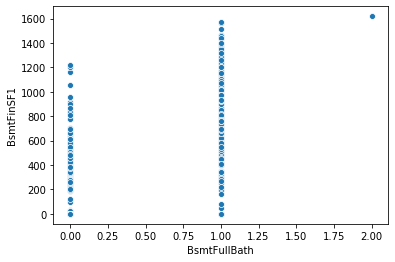

In [22]:
sns.scatterplot(x=numeric_df[new_list_of_numeric_attributes]['BsmtFullBath'],
                y=numeric_df[new_list_of_numeric_attributes]['BsmtFinSF1'])
plt.savefig('BsmtFullBath.pdf')

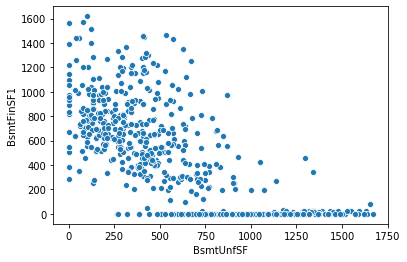

In [23]:
sns.scatterplot(x=numeric_df[new_list_of_numeric_attributes]['BsmtUnfSF'],
                y=numeric_df[new_list_of_numeric_attributes]['BsmtFinSF1'])
plt.savefig('BsmtUnfSF.pdf')

In [24]:
remove_2_attributes = top_five_attribute[0:2].index.to_list()
remove_2_attributes

['BsmtFullBath', 'BsmtUnfSF']

In [25]:
numeric_df = numeric_df.drop(columns=remove_2_attributes)
numeric_df

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,65.0,8450,2003,2003,196.0,706,856,856,854,1710,...,3,8,0,2003.0,2,548,0,61,2,2008
2,68.0,11250,2001,2002,162.0,486,920,920,866,1786,...,3,6,1,2001.0,2,608,0,42,9,2008
4,84.0,14260,2000,2000,350.0,655,1145,1145,1053,2198,...,4,9,1,2000.0,3,836,192,84,12,2008
6,75.0,10084,2004,2005,186.0,1369,1686,1694,0,1694,...,3,7,1,2004.0,2,636,255,57,8,2007
10,70.0,11200,1965,1965,0.0,906,1040,1040,0,1040,...,3,5,0,1965.0,1,384,0,0,2,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,78.0,9262,2008,2009,194.0,0,1573,1578,0,1578,...,3,7,1,2008.0,3,840,0,36,5,2009
1452,35.0,3675,2005,2005,80.0,547,547,1072,0,1072,...,2,5,0,2005.0,2,525,0,28,5,2006
1453,90.0,17217,2006,2006,0.0,0,1140,1140,0,1140,...,3,6,0,NaN,0,0,36,56,7,2006
1454,62.0,7500,2004,2005,0.0,410,1221,1221,0,1221,...,2,6,0,2004.0,2,400,0,113,10,2009


In [26]:
new_whole_df = new_whole_df.drop(columns=remove_2_attributes)
new_whole_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,61,NaN,NaN,NaN,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,42,NaN,NaN,NaN,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,192,84,NaN,NaN,NaN,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,255,57,NaN,NaN,NaN,8,2007,WD,Normal,307000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,2,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,36,NaN,NaN,NaN,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,28,NaN,NaN,NaN,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,36,56,NaN,NaN,NaN,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,113,NaN,NaN,NaN,10,2009,WD,Normal,185000


# Q7
**Remove the categorical attribute 'GarageCond' from the new_whole_df**

In [27]:
removed_categorical_attribute = 'GarageCond'
new_whole_df = new_whole_df.drop(columns=removed_categorical_attribute)

# Q8
**8. (Code) For each of the remaining numeric attributes, fill in the missing values with the corresponding mean value (missing entries are denoted “NA” in the data set). Show the filled-in values in the report.**

In [28]:
# mean value for the remaining numeric attributes with missing values
for col in numeric_df.columns:
    if numeric_df[col].isnull().values.any():
        print (col, numeric_df[col].mean())

LotFrontage 67.98046875
MasVnrArea 76.1150159744409
GarageYrBlt 1985.5373134328358


In [29]:
# Fill in the missing values in the numeric_df
for col in numeric_df.columns:
    numeric_df[col] = numeric_df[col].fillna(numeric_df[col].mean())

In [30]:
# Fill in the missing values in the new_whole_df
for col in numeric_df.columns:
    new_whole_df[col] = new_whole_df[col].fillna(new_whole_df[col].mean())

# Q9
**9. (Code) For attributes “MasVnrType” and “Electrical”, fill in the missing values with the corresponding most popular value in the data set. Show the filled-in values in the report.**

In [31]:
# Define two variables to store the name of attributes 'MasVnrType' and 'Electrical'
att1 = 'MasVnrType'
att2 = 'Electrical'

In [32]:
# Most popular value in the column of attribute 'MasVnrType'
new_whole_df[att1].value_counts().idxmax()

'None'

In [33]:
# Most popular value in the column of attribute 'Electrical'
new_whole_df[att2].value_counts().idxmax()

'SBrkr'

In [34]:
new_whole_df[att1] = new_whole_df[att1].fillna(value=new_whole_df[att1].value_counts().idxmax())

In [35]:
new_whole_df[att2] = new_whole_df[att2].fillna(value=new_whole_df[att2].value_counts().idxmax())

# Q10
**(Code) Standardize each numeric attribute such that the mean is 0 and the standard deviation is 1 using the built-in functions from ’scikit-learn’.**

In [36]:
from sklearn import preprocessing

In [37]:
for column in numeric_df.columns:
    numeric_df[column] = preprocessing.scale(numeric_df[column])
numeric_df

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,-0.207504,-0.219997,0.803289,0.683882,1.125562,0.615534,-0.619685,-0.840364,1.305384,0.704391,...,0.334820,1.279940,-0.906365,7.739321e-01,0.279133,0.378296,-0.894787,0.445549,-1.656689,0.158140
2,0.001360,0.744052,0.727153,0.633369,0.806347,0.086487,-0.417042,-0.629420,1.334302,0.891100,...,0.334820,-0.207430,0.805959,6.852938e-01,0.279133,0.690880,-0.894787,0.020628,0.997499,0.158140
4,1.115303,1.780405,0.689085,0.532344,2.571419,0.492892,0.295373,0.112179,1.784943,1.903260,...,1.801985,2.023625,0.805959,6.409746e-01,1.734774,1.878699,1.042509,0.959927,2.135008,0.158140
6,0.488710,0.342595,0.841356,0.784907,1.031675,2.209890,2.008336,1.921680,-0.752624,0.665084,...,0.334820,0.536255,0.805959,8.182513e-01,0.279133,0.836752,1.678184,0.356092,0.618329,-0.592132
10,0.140603,0.726837,-0.643294,-1.235599,-0.714620,1.096486,-0.037087,-0.233901,-0.752624,-0.941597,...,0.334820,-0.951115,-0.906365,-9.101971e-01,-1.176509,-0.476100,-0.894787,-0.918672,-1.656689,0.158140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.697574,0.059578,0.993628,0.986958,1.106785,-1.082225,1.650545,1.539345,-0.752624,0.380107,...,0.334820,0.536255,0.805959,9.955281e-01,1.734774,1.899538,-0.894787,-0.113558,-0.519180,0.908411
1452,-2.296147,-1.864044,0.879424,0.784907,0.036475,0.233178,-1.598068,-0.128429,-0.752624,-0.862982,...,-1.132344,-0.951115,-0.906365,8.625705e-01,0.279133,0.258472,-0.894787,-0.292472,-0.519180,-1.342403
1453,1.533031,2.798509,0.917492,0.835420,-0.714620,-1.082225,0.279542,0.095699,-0.752624,-0.695927,...,0.334820,-0.207430,-0.906365,-1.007702e-14,-2.632150,-2.476638,-0.531544,0.333727,0.239159,-1.342403
1454,-0.416369,-0.547085,0.841356,0.784907,-0.714620,-0.096274,0.536011,0.362674,-0.752624,-0.496934,...,-1.132344,-0.207430,-0.906365,8.182513e-01,0.279133,-0.392745,-0.894787,1.608491,1.376669,0.908411


# Q11
**11. (Code) For the remaining numeric attributes, find the smallest set of PCA features so that the proportion of explained variance is at least 0.9. Plot the graph of the cumulative explained variance in your report. Using the number of components found, perform PCA. Output and report the five-number summary for each component.**

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(numeric_df.columns))
pca.fit(numeric_df)
numeric_df_dr = pca.transform(numeric_df)

In [39]:
numeric_df_dr

array([[ 1.72561746e+00,  1.66776543e+00,  1.44039924e+00, ...,
         1.53590107e-01, -1.89999478e-01,  2.33366559e-16],
       [ 1.87692380e+00,  1.39598738e+00,  5.99248842e-01, ...,
         1.74669455e-01, -1.14904699e-01, -2.73587835e-16],
       [ 5.38578980e+00,  1.72673851e+00, -1.59628091e+00, ...,
         1.13248281e-02, -9.61823854e-02, -1.64505031e-16],
       ...,
       [-1.48831096e+00,  4.21885803e-01, -1.06439987e+00, ...,
         2.68944567e-01,  4.52711946e-01,  5.57236005e-16],
       [ 1.23050513e-01, -1.64100169e+00,  1.67427388e+00, ...,
        -3.17470385e-01,  1.18089675e-01,  9.23990966e-17],
       [ 1.02224622e+00,  1.69429820e+00,  1.47175358e+00, ...,
        -4.69841116e-03, -1.80278140e-01, -5.47475709e-16]])

In [40]:
cum_variance = pd.DataFrame(pca.explained_variance_ratio_.cumsum(),columns=['PCA'])

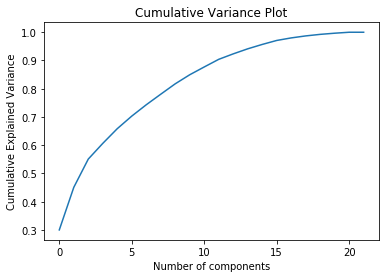

In [41]:
plt.plot(cum_variance)
plt.title('Cumulative Variance Plot')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig('cumulative_variance_plot.pdf')
plt.show()

In [42]:
cum_variance

,PCA
0,0.300264
1,0.450983
2,0.551041
3,0.606569
4,0.658645
5,0.703145
6,0.743285
7,0.780656
8,0.817494
9,0.849527


In [43]:
# the smallest set of PCA features
smallest_no = 1
for value in cum_variance['PCA']:
    if value < 0.9:
        smallest_no+=1
smallest_no

12

In [44]:
final_pca = PCA(n_components=smallest_no)
final_pca.fit(numeric_df)
df_after_pca = final_pca.transform(numeric_df)

In [45]:
df_after_pca = pd.DataFrame(df_after_pca)
df_after_pca.columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6',
                        'PCA7','PCA8','PCA9','PCA10','PCA11','PCA12']

In [46]:
# Five-number summary for each component
five_number_summary = df_after_pca.describe()[3:]
five_number_summary.T

,min,25%,50%,75%,max
PCA1,-6.720568,-2.025478,0.361374,1.745746,7.167636
PCA2,-4.006546,-1.480178,-0.153982,1.697272,4.817172
PCA3,-4.554189,-1.061631,0.002411,1.051319,4.578652
PCA4,-2.998494,-0.713814,0.019017,0.804957,3.054826
PCA5,-3.082817,-0.754849,-0.063632,0.707279,3.419611
PCA6,-2.771552,-0.635112,0.000198,0.617376,3.058426
PCA7,-3.104998,-0.581208,-0.006827,0.702470,3.218709
PCA8,-2.408561,-0.624068,-0.051370,0.603462,2.950301
PCA9,-2.937591,-0.581342,0.015165,0.590822,3.020794
PCA10,-2.592734,-0.558218,0.001992,0.581314,3.158090


In [47]:
five_number_summary.T.to_excel('five_number_summary.xlsx')

# Q12
**12. (Code) Output the resulting numeric components to a csv file with the name “numeric train.csv”, and the categorical attributes to a csv file with the name “categorical train.csv” using ’pandas’. (Be sure to preserve the “NA” values for the categories).**

In [48]:
df_after_pca

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
0,1.725617,1.667765,1.440399,-1.560205,-0.056446,0.167248,0.241686,0.434080,1.466379,-0.740416,-0.202170,1.311304
1,1.876924,1.395987,0.599249,0.152557,0.135279,-0.777458,0.364495,-0.388803,0.475176,1.191085,0.887468,0.596272
2,5.385790,1.726739,-1.596281,0.787564,0.332880,-1.449650,1.688157,-0.889885,0.433352,0.149902,-0.198963,0.098250
3,3.118844,-2.812682,-1.495605,0.622370,0.736950,-0.131031,0.186383,0.825965,-0.774245,-0.420678,-0.359958,0.996917
4,-2.829736,-0.384673,-1.404818,-1.803264,-0.826391,0.050180,-0.535143,1.026914,0.171196,-0.130745,-0.402494,0.506413
...,...,...,...,...,...,...,...,...,...,...,...,...
626,3.062183,-1.951647,-0.124305,-0.703567,-1.238717,1.167537,-0.704583,-1.780552,0.954236,0.270856,0.611533,-0.591490
627,-1.845268,-1.544156,2.994072,0.566196,-0.002460,-0.467343,-0.647515,0.283514,1.640686,-0.148701,-0.522341,1.036583
628,-1.488311,0.421886,-1.064400,0.498806,-2.945389,0.105031,-0.177087,1.712483,-2.697506,-0.842445,2.118827,0.925743
629,0.123051,-1.641002,1.674274,0.676299,-0.821724,1.322604,1.775056,0.263691,-0.346007,1.001421,0.628518,-0.259784


In [49]:
df_after_pca.to_csv('numeric_train.csv')

In [50]:
numeric_df.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold'],
      dtype='object')

In [51]:
# Drop numeric attributes in the new whole dataframe to obtain 
# a dataframe consisting of categorical attributes only
new_whole_df = new_whole_df.drop(columns=numeric_df.columns)
new_whole_df.to_csv("categorical_train.csv",na_rep='NA',index=False)